<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-2-Sprint-4-Model-Validation/blob/master/LS_DS_241_Begin_modeling_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Model Validation_ 

# Begin the modeling process

Objectives
- Train/Validate/Test split
- Cross-Validation
- Begin with baselines

## Get the Bank Marketing dataset

You have several ways you can get the dataset:

#### Kaggle
- Download from the [Kaggle competition page](https://www.kaggle.com/c/ds2-model-validation/data)
- Use the Kaggle API

#### GitHub
- Clone the [repo](https://github.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/tree/master/module-1-begin-modeling-process/bank-marketing)
- Download from the repo:

In [0]:
# These will take you to html pages -- don't use

# !wget https://github.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/blob/master/module-1-begin-modeling-process/bank-marketing/train_features.csv
# !wget https://github.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/blob/master/module-1-begin-modeling-process/bank-marketing/train_labels.csv
# !wget https://github.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/blob/master/module-1-begin-modeling-process/bank-marketing/test_features.csv
# !wget https://github.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/blob/master/module-1-begin-modeling-process/bank-marketing/sample_submission.csv    

In [39]:
# Getting all files from GitHub
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_features.csv
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_labels.csv
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/test_features.csv
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/sample_submission.csv

--2019-03-04 21:08:06--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3833210 (3.7M) [text/plain]
Saving to: ‘train_features.csv.1’

train_features.csv. 100%[===================>]   3.66M  --.-KB/s    in 0.1s    

2019-03-04 21:08:06 (35.6 MB/s) - ‘train_features.csv.1’ saved [3833210/3833210]

--2019-03-04 21:08:07--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/bank-marketing/train_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.gi

In [0]:
# Not sure why this directory code was here
# %cd bank-marketing

In [1]:
import pandas as pd

# Importing all 4 datasets
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
test_features = pd.read_csv('test_features.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Looking at shapes of those datasets
train_features.shape, train_labels.shape, test_features.shape, sample_submission.shape

((30891, 20), (30891, 2), (10297, 20), (10297, 2))

In [2]:
# Looking at head of train_labels
train_labels.head()

,id,y
0,20591,0
1,18343,0
2,32826,0
3,29780,0
4,40736,0


In [3]:
train_features.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,20591,29,services,single,high.school,no,yes,yes,cellular,may,thu,10,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
1,18343,54,management,married,university.degree,no,no,no,cellular,nov,tue,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8
2,32826,55,self-employed,married,unknown,unknown,no,no,cellular,jul,mon,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
3,29780,43,blue-collar,married,unknown,unknown,no,no,cellular,may,mon,6,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
4,40736,54,blue-collar,married,basic.4y,no,yes,no,telephone,may,wed,5,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0


In [4]:
test_features.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,12668,41,blue-collar,single,basic.9y,no,yes,no,cellular,may,wed,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1
1,44327,31,services,divorced,high.school,no,yes,no,cellular,nov,thu,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
2,26675,56,admin.,married,basic.9y,no,no,no,cellular,oct,wed,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5
3,11771,32,blue-collar,single,university.degree,no,no,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
4,38173,32,blue-collar,married,high.school,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8


In [0]:
# Splitting data up into X_train and X_test, and y_train
y_train = train_labels['y']
X_train = train_features.drop(columns='id')
X_test  = test_features.drop(columns='id')

## Train/Validation/Test split

How can we get from a two-way split, to a three-way split?

We can use the [**`sklearn.model_selection.train_test_split`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split the training data into training and validation data.

In [6]:
# Splitting data into to 3 parts by using train_test_split to make validation dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((23168, 19), (7723, 19), (23168,), (7723,))

Fit on the training set.

Predict and score with the validation set.

## Majority class baseline

Determine the majority class:

In [7]:
# Looking at value counts to use in baseline model
y_train.value_counts(normalize=True)

0    0.886999
1    0.113001
Name: y, dtype: float64

Guess the majority class for every prediction:

In [8]:
# Multiplying 0s list by number -- doing same below
[0] * 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:
# Making prediction all 0s, the majority class
majority_class = 0
y_pred = [majority_class] * len(y_val)

#### [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Baseline accuracy by guessing the majority class for every prediction:

In [10]:
# Using actual values and predictions to get accuracy score -- very similar to raw value counts
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.8883853424834909

#### [`sklearn.metrics.roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

Baseline "ROC AUC" score by guessing the majority class for every prediction:

In [11]:
# Setting up roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

# A number that ranges from zero to one, but always 0.5 if you just guess majority class

0.5

## Fast first models

### Ignore rows/columns with nulls

This dataset doesn't have any nulls:

In [12]:
# For baseline models, ignore high null value columns. Drop rows with nulls
X_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

### Ignore nonnumeric features

Here are the numeric features:

In [13]:
# Looking at only numeric columns
import numpy as np
X_train.describe(include=np.number)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000
mean,40.071046,2.577909,962.871720,0.176062,0.080141,93.575410,-40.486468,3.617116,5166.719816
std,10.424331,2.790906,185.926918,0.498491,1.570538,0.577793,4.639631,1.736938,72.451630
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Here are the nonnumeric features:

In [14]:
# Looking at only nonnumeric columns
X_train.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,23168,23168,23168,23168,23168,23168,23168,23168,23168,23168
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,5869,14003,6807,18315,12047,19064,14655,7801,4790,19947


Just select the nonnumeric features:

In [0]:
# Making new X train and validation variables by excluding nonnumeric columns
X_train_numeric = X_train.select_dtypes(np.number)
X_val_numeric = X_val.select_dtypes(np.number)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_numeric, y_train)

# Using logistic regression to get an roc_auc_score
y_pred = model.predict(X_val_numeric)
roc_auc_score(y_val, y_pred)

0.5917605342547794

### With Scaler

In [17]:
# Scaling data, also getting rid of some warnings that we don't need
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric) # Only fitting model to train data
X_val_scaled = scaler.transform(X_val_numeric) # Transforming validation set without fitting

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_numeric, y_train)

# Using log regression again -- got lower score
y_pred = model.predict(X_val_scaled)
roc_auc_score(y_val, y_pred)

0.483936493668947

### Same, as a pipeline

In [18]:
# Creating a pipeline 
from sklearn.pipeline import make_pipeline

# Putting scaler and log regression inside pipeline
pipeline = make_pipeline(
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

# Fitting numeric training data to pipeline
pipeline.fit(X_train_numeric, y_train)

# Using pipeline to predict y variable with X validation set
y_pred = pipeline.predict(X_val_numeric)
roc_auc_score(y_val, y_pred) # Showing roc_auc_score

0.5918334099288793

### Encode "low cardinality" categoricals

One-hot encode the "low cardinality" categoricals

In [19]:
# Looking a number of unique values in nonnumeric columns -- all have pretty low cardinality
X_train.select_dtypes(exclude=np.number).nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

Install the Category Encoder library

If you're running on Google Colab:

```
!pip install category_encoders
```

If you're running locally with Anaconda:

```
!conda install -c conda-forge category_encoders
```

In [20]:
# Installing category_encoders from sklearn
!pip install category_encoders

In [21]:
import category_encoders as ce

# Adding encoder to pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
roc_auc_score(y_val, y_pred)
# Got a little better score

0.6113944413614597

In [22]:
X_val.shape

(7723, 19)

In [23]:
X_test.shape

(10297, 19)

In [24]:
pipeline.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1:]
y_pred_proba

array([[0.10419833],
       [0.06439746],
       [0.4071727 ],
       ...,
       [0.07966831],
       [0.01862054],
       [0.04070407]])

In [0]:
submission = sample_submission.copy()
submission['y'] = pipeline.predict_proba(X_test)[:, 1:]
submission.to_csv('submission-001.csv', index=False)

In [0]:
# !ls -lh *.csv

In [28]:
submission.y.describe()

count    10297.000000
mean         0.112097
std          0.144393
min          0.004955
25%          0.041329
50%          0.058551
75%          0.092627
max          0.924779
Name: y, dtype: float64

# Assignment

Make a submission to Kaggle (https://www.kaggle.com/t/a5f57d2e2b2540529833c97b76b8ce5e) and commit your code to your fork of the GitHub repo (https://github.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/tree/master/module-1-begin-modeling-process)

In [0]:
# Did this part above

### Stretch Goals

- Apply the lesson to other datasets you’ve worked with before, and compare results.
- See this example from scikit-learn documentation: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html … This demonstrates the improved OneHotEncoder and new ColumnTransformer objects, which can replace functionality from third-party libraries like category_encoders and sklearn-pandas. Adapt this example, which uses Titanic data, to work with another dataset.
- See the weather data example in cells 19-22 of this notebook: https://github.com/LambdaSchool/DS-Unit-2-Sprint-4-Model-Validation/blob/master/module-1-begin-modeling-process/more-notebooks/Begin%20with%20baseline%20models.ipynb … Get weather data for your own area (https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table) and calculate both baselines (“persistence” and “climatology.“) What is the mean absolute error for each baseline? What if you average the two together?

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv')
df = df.drop(columns=['Unnamed: 0', 'sibsp', 'parch', 'class', 'who', 'deck', 'embark_town', 'alive'])
df.head(10)

,survived,pclass,sex,age,fare,embarked,adult_male,alone
0,0,3,male,22.0,7.2500,S,True,False
1,1,1,female,38.0,71.2833,C,False,False
2,1,3,female,26.0,7.9250,S,False,True
3,1,1,female,35.0,53.1000,S,False,False
4,0,3,male,35.0,8.0500,S,True,True
5,0,3,male,NaN,8.4583,Q,True,True
6,0,1,male,54.0,51.8625,S,True,True
7,0,3,male,2.0,21.0750,S,False,False
8,1,3,female,27.0,11.1333,S,False,False
9,1,2,female,14.0,30.0708,C,False,False


In [31]:
df.shape

(891, 8)

In [39]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64

In [33]:
df.dtypes

survived        int64
pclass          int64
sex            object
age           float64
fare          float64
embarked       object
adult_male       bool
alone            bool
dtype: object

In [0]:
df['age'] = df['age'].fillna(df['age'].mean())

In [35]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [0]:
df['embarked'] = df['embarked'].fillna('S')

In [38]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,survived,pclass,sex,age,fare,embarked,adult_male,alone
0,1,3,male,29.699118,15.2458,C,True,False
1,0,2,male,31.000000,10.5000,S,True,True
2,0,3,male,20.000000,7.9250,S,True,True
3,1,2,female,6.000000,33.0000,S,False,False
4,1,3,female,14.000000,11.2417,C,False,False


In [40]:
df_train = df.head(624)
df_test = df.tail(267)

df.shape, df_train.shape, df_test.shape

((891, 8), (624, 8), (267, 8))

In [0]:
X_train = df_train.drop(columns='survived')
y_train = df_train['survived']

X_test = df_test.drop(columns='survived')
y_test = df_test['survived']

In [42]:
# Splitting the train set into train and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.5, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((312, 7), (312, 7), (312,), (312,))

In [43]:
X_train.isnull().sum()

pclass        0
sex           0
age           0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64

In [44]:
# Looking at how many categories in string columns -- there aren't many, which is good
X_train.select_dtypes(exclude=np.number).nunique()

sex           2
embarked      3
adult_male    2
alone         2
dtype: int64

In [45]:
# Making pipline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
roc_auc_score(y_val, y_pred)

0.770940170940171

In [48]:
# Looking at percent of predictions
pd.Series(pipeline.predict(X_test)).value_counts(normalize=True)

0    0.606742
1    0.393258
dtype: float64

In [49]:
# Looking at actual percent of survived
df['survived'].value_counts(normalize=True)

# The predictions are very close

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [50]:
# Looking at the probabilities of survival for each participant in dataset
y_pred_proba = pipeline.predict_proba(X_test)[:, 1:]
y_pred_proba

array([[0.29703178],
       [0.43243666],
       [0.98601068],
       [0.04061037],
       [0.11523938],
       [0.17591079],
       [0.45653104],
       [0.6538453 ],
       [0.06672862],
       [0.70284032],
       [0.07400952],
       [0.09118175],
       [0.07835689],
       [0.07663844],
       [0.29958038],
       [0.12736321],
       [0.96752533],
       [0.56139402],
       [0.84040967],
       [0.96298528],
       [0.86443569],
       [0.11843091],
       [0.01358393],
       [0.03028233],
       [0.96160347],
       [0.46030619],
       [0.64449689],
       [0.0485587 ],
       [0.17015623],
       [0.66222573],
       [0.0577084 ],
       [0.33233868],
       [0.63504671],
       [0.59364063],
       [0.31889733],
       [0.03905813],
       [0.16455062],
       [0.5817205 ],
       [0.07932832],
       [0.98145473],
       [0.07663648],
       [0.22108013],
       [0.97395504],
       [0.19054817],
       [0.05975223],
       [0.52180377],
       [0.09326275],
       [0.608

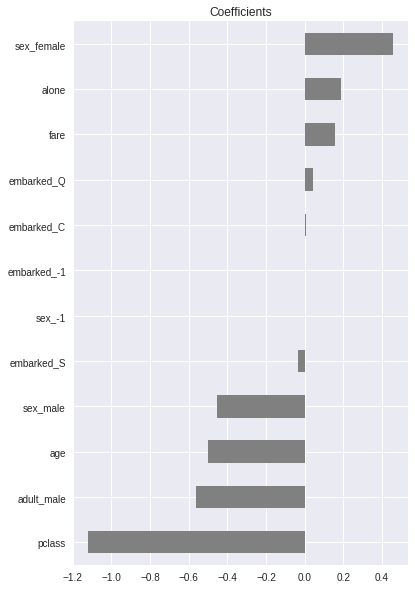

In [53]:
import matplotlib.pyplot as plt

# Visualizing coeffecients
plt.figure(figsize=(6,10))
plt.title('Coefficients')

coefficients = pipeline.named_steps['logisticregression'].coef_[0]
feature_names = pipeline.named_steps['onehotencoder'].transform(X_train).columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');